#  1st Tutorial on Molecular Dynamics: A Simple MD Code

It is our goal to write a **simple coarse-grained MD Code to simulate a Lennard-Jones (LJ) fluid in the NVE ensemble.** This means we will have simple spherical particles that interact with each other via a LJ potential. The time development of the system, i.e. the movement of these atoms, results from time integrating Newton's equations of motion by using the **Velocity-Verlet algorithm**. NVE means that our system has a constant particle number N, simulation box volume V and total energy E.


## ****Overall aim:**** Complete the code of this simple MD program. 

*You can either start from scratch or use the outlined structure and hints to fill in the gaps. In the end, the code should be able for perform a functional MD simulation and should have some simple capabilities for measurements.*

### 1. Define the basic parameters of the simulation, e.g. number of particles, size of the box, timestep, interaction potential (LJ potential), etc.

In [138]:
import numpy as np
import math
import matplotlib.pyplot as plt
import random

# activate this for interactive plots (zooming, rotation)
#%matplotlib notebook 

# activate this for simple drawn plots (non-interactive)
%matplotlib inline 

# simulation parameters in LJ units
N = 50 # number of particles
L = 9.0 # edge length of a cubic box
nsteps = 25000 # number of time steps
dt = 0.0005 # timestep
m = 1.0 # mass of one particle
V = # ... Add code here ... # box volume
rho = # ... Add code here ... # density


### The Lennard-Jones Potential:

\begin{equation}
U_\mathrm{LJ}(r) = 4 \epsilon \bigg[ \bigg(\frac{\sigma}{r}\bigg)^{12}  - \bigg(\frac{\sigma}{r}\bigg)^{6} \bigg]
\end{equation}
$r$ - distance between particle centers <br>
$\epsilon$ - interaction strength (potential depth) <br>
$\sigma$ - particle "size" (root of the potential)<br>
<br>

In simulations the LJ potential (and its negative first derivate, i.e. the force) is truncated (or cut off) at a certain distance $r$. The reasoning behind this is that the potential is nearly at zero for large enough values of $r$, anyway. When particles further apart than the cutoff distance $r_\mathrm{cut}$ are ignored in the force calculation, a lot of simulation time is saved, while the particle interactions remain realistic.
<br>
<br>

The **typical cutoff distance of the LJ potential in coarse-grained MD is $r_\mathrm{cut} = 2.5$.** In this case the particles have repulsive interactions at very short distances and attractive interactions at intermediate distances. The potential is not only truncated but also shifted along the y-axis: This is neccessary to have zero energy (and zero force) exactly at the cutoff distance: $U_\mathrm{LJ}(r_\mathrm{cut}) \stackrel{!}{=} 0$ and $F(r_\mathrm{cut}) \stackrel{!}{=} 0$. Any nonzero values $U_\mathrm{LJ}(r_\mathrm{cut}), F(r_\mathrm{cut}) \neq 0$ would be a sudden "jump" in the energy (or force) and hence an unphysical artefact.
<br>
<br>

The **shifted, truncated LJ-Potential** is obtained by subtracting the function value at the cutoff:

\begin{equation} U_\mathrm{LJ, cut}(r) = U_\mathrm{LJ}(r) - U_\mathrm{LJ}(r_\mathrm{cut}) \end{equation}

#### Typical values of the cutoff distance $r_\mathrm{cut}$ :

$r_\mathrm{cut,\,short} = \min(U_\mathrm{LJ}(r)) = \sqrt[6]{2} \approx 1.12246$ - "short" cutoff, no attractive part <br>
$r_\mathrm{cut,\, long} = 2.5$ - long cutoff, with attractive part <br>

In [139]:
# Parameters of the LJ potential
rcut =  1.12246
epsilon = 1.0
sigma = 1.0

def U(x):
    """ Lennard-Jones pot. (12-6) to calculate potential energy """
    # ... Add code here ...

def DU(x):
    """ spatial derivative of the LJ pot. to calculate forces """
    # ... Add code here ...

###  2. Play around with the parameters of the LJ potential ($\epsilon$, $\sigma$, $r_\mathrm{cut}$) and plot a few different cases.
*Where is the minimum of the LJ potential? Which value of $r_\mathrm{cut}$ leads to a LJ potential without any attractive part?*

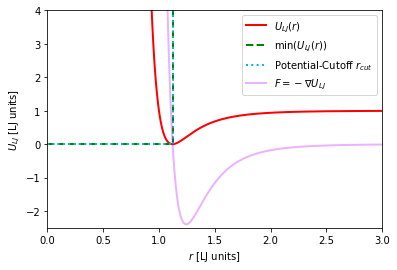

In [140]:
# Plot of the Lennard-Jones potential
# ... Add code here ...

### 3. Define a class containing the neccessary information of all particles.

*The class should contain **particle indices, spatial coordinates, velocities, accelerations and forces.** It should also a) initialize the arrays holding the particles and b) have a function to distribute the particle in the box (e.g. on a grid) and to assign starting velocities (e.g. randomly distributes velocities). At the least, the particle positions should not overlap.*

In [141]:
class Atom:
    """ Class Atom represents and manipulates atom types, coordinates etc. """
        
    def __init__(self, N_=10):
        # initialization method, like a constructur in C++
        # Class should store indices (ind), positions (r), velocities (v), accelerations (a) and forces (f)
        # ... Add code here ...
        #self.ind = ...
        #self.r = ...
        #self.v = ...
        #self.a = ...
        #self.f = ...
        
    def initializeMD(self):
        # put atoms on a lattice and assign velocity
        # ... Add code here ...  
            
        # set random velocities
        # ... Add code here ...

### (Optional visual test -  looking at a 3D plot of the particles in the simulation box)

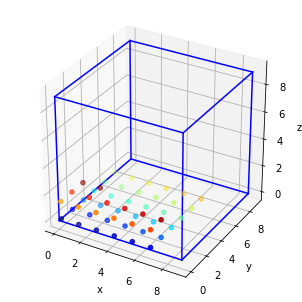

In [142]:
from matplotlib.pyplot import cm
from mpl_toolkits.mplot3d import Axes3D

# new Atom class instance
# ... Add code here ...

# plot the initial setup
# ... Add code here ...

### Short excursion into periodic boundary conditions

Our LJ fluid is supposed to be inside a box with periodic boundary conditions (PBC). **In MD simulations this means taking into account two principles.**
<br>

1. **Periodic Boundary Conditions "per se"** - Particles that leave the box on one side (dimension) need to reenter the same box on the other side.

<center>(Image source: doi:10.1002/wcms.1358)</center>
<img src="img/pbc.jpg" width=200 />


2. **Minimum Image Convention** - Particle distances (and hence, forces) need to be evaluated between the nearest (!) images of these particles.

<center>(Image source: https://freidok.uni-freiburg.de/data/1506) </center>
<img src="img/mic.jpg" width=250 />


We need to implement this in the right parts of the program as part of the time integration routine. Let us therefore focus on this part next.

### 4. Write the functions which calculate positions, velocities, accelerations and forces at a new timestep. We will later call them in the main loop to implement the Velocity-Verlet algorithm.

***4a)*** *At first, let us write the three functions update_pos, update_vel and update_acc according to the Velocity-Verlet algorithm. Keep in mind the periodic boundary conditions for update_pos!*

In [143]:
def update_pos(r, v, a):
    """ Updates particle positions and enforces PBC """
    # ... Add code here ...
    
def update_vel(v,a,f):
    """ Updates particle velocities """
    # ... Add code here ...

def update_acc(a,f):
    """ Updates particle accelerations """
    # ... Add code here ...

***4b)*** *Next, we will write the function update_force. Here, the forces between all pairs of particles are calculated. This part typically consumes the most CPU time. (Optional: It is practical to also calculate potential energy and the virial for the pressure calculation at this point.)*

In [144]:
def update_force(r,f):
    """ Calculates forces between pairs of particles, as well as potential energy and pressure."""
    # ... Add code here ...

Let's think about how potential energy, kinetic energy, temperature etc. are calculated in MD simulations.

#### Potential Energy:

The potential energy is the sum of the all particle interactions due to the interaction potential (and possible contributions from external potentials),

\begin{equation} E_\mathrm{pot} = \sum_{i<j} U_\mathrm{LJ}\left(r_{ij}\right). \end{equation}


#### Kinetic Energy:

The system's kinetic energy is the sum of the kinetic energies of all particles,

\begin{equation} E_\mathrm{kin} = \sum_i^N \frac{m_i v_i^2}{2}. \end{equation}


#### Temperature

Temperature is evaluated based on the **equipartition theorem**: $ \langle E_\mathrm{kin} \rangle = \frac{3}{2} N k_\mathrm{B} T. $ (Here, in LJ units, $k_\mathrm{B} = 1$). It follows

\begin{equation} T =  \frac{2}{3N} \langle E_\mathrm{kin} \rangle \end{equation}.

#### Pressure:

Pressure in MD simulations can be forumlated in the form of the so-called **virial equation** (see e.g. Hansen & McDonald "Theory of Simple Liquids", Chapter 2.2 for more details where this is coming from).

\begin{equation} P =  \frac{N k_\mathrm{B} T}{V}  + \frac{1}{3V}  \langle \sum_{i<j} \vec{F_{ij}} \cdot \vec{r_{ij}} \rangle . \end{equation}


### 5. Write a function called *compute*, that calculates thermodynamic observables from atomistic information at certain time steps and prints them to the screen.

*The function compute is meant to calculate and output information like **temperature, kinetic energy, potential energy, total energy, pressure and average particle velocity.** This function will only to be called at specific times, e.g. every 100 time steps, and not at every step like the time integration.*

In [145]:
def compute(step, v):
    """ Calculates and displays thermodynamic observables (scalars)"""
    
    # Kinetic Energy
    # ... Add code here ...

    # Temperature
    # ... Add code here ...
    
    # Average velocity of particles
    # ... Add code here ...
    
    # pressure = N*k_b*T/V + virial/(dimensions*V)
    # ... Add code here ...

    # output thermodynam. info
    #if step == 0:
    #    print("  Step\tTemp\tEpot\tEkin\tEtot\tMeanVel\tPress".expandtabs(10))    
    #print("%6d\t%3.4f\t%3.4f\t%3.4f\t%3.4f\t%3.4f\t%3.4f".expandtabs(8) % (step, T, Epot, Ekin, Ekin+Epot,  meanvel, P))

### (Optional: Write out the particle trajectory in the xyz-Format. The resulting file can be watched like a film in programs like VMD, etc.)

*xyz is a relatively simple format. You can use Google to find out how the format is structured.*

In [146]:
# def movie(switch, r):
#     """ Write film in XYZ format and save to file. """

### (Optional: Calculate the radial distribution function (rdf), also known as pair correlation function g(r) of the system.)

*The rdf describes the probability to find a particle at a distance r from a reference particle at zero. In principle, the rdf is a histogram over the particle distance. The bins of the histogram are shere shells around the reference particle in the center (at r=0). The histogram is normalized by "comparing" the system to an ideal gas with equivalent density as a reference system. At large distances r the rdf typically goes towards 1.*

<center>(Image source: http://isaacs.sourceforge.net/manual/page23_ct.html)</center>
<img src="img/rdf.png" width=200 />

In [147]:
# def rdf(switch, r):
#     """ Calculate, plot and save radial distribution function g(r) """

Next comes the main time loop of the program. Here, the MD code is performing its job, i.e. an instance of the Atom class is created, and initial setup is created and then the time integration is performed interatively using the Velocity-Verlet algorithm. Additionally, some thermodynamic output is generated and further functionalities can be evoked as well.

### 6. Implement the Velocity-Verlet algorithm in the main loop and print thermodynamic information to the screen regularly, e.g. every 100 steps.
*Make sure to call update_pos, update_vel, update_acc and update_force in the suitable order. You can use if statements to call functions only at certain times.*


  Step    Temp      Epot      Ekin      Etot      MeanVel   Press
     0     9.7408   0.0000   730.5567   730.5567   0.0989   0.6681
  1000     16.1901   0.0800   1214.2598   1214.3398   0.1229   1.1084
  2000     24.0264   0.1077   1801.9826   1802.0903   0.1557   1.6425
  3000     25.3624   0.0297   1902.1772   1902.2069   0.1618   1.7379
  4000     27.2149   0.1149   2041.1155   2041.2305   0.1690   1.8623
  5000     27.9913   0.0532   2099.3452   2099.3984   0.1710   1.9179
  6000     28.7612   0.0164   2157.0885   2157.1049   0.1758   1.9719
  7000     28.4563   0.0218   2134.2237   2134.2455   0.1750   1.9503
  8000     29.2338   0.1147   2192.5365   2192.6512   0.1780   2.0017
  9000     28.9439   0.0081   2170.7928   2170.8009   0.1772   1.9845
 10000     29.2042   0.1396   2190.3185   2190.4580   0.1779   1.9996
 11000     28.9386   0.0016   2170.3978   2170.3993   0.1771   1.9846
 12000     28.6895   0.0161   2151.7088   2151.7249   0.1764   1.9668
 13000     28.9824   0.0000

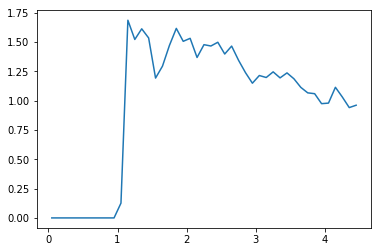

In [148]:
%%time

# main loop of the program
for j in range(nsteps+1):
    
    # Initialize System at time zero
    if j == 0:
        # ... Add code here ...

    # at all other times: time integration via Velocity-Verlet
    else:
        # ... Add code here ...

    # regular calculation & output of thermodynamic info
    # ... Add code here ...


### 7. (Optional) Now the program should be fully functional, at least in a simple way - particles are moving and some output is generated. Pick a task to further extend the code:
*Here are a few ideas that could be implemented:*

* Calculate and output **pressure of the sytem.**
* Write out a **movie in the xyz format.** Files of this format can be opened with visualization software like VMD and others. Then you can watch the moving particles on your screen. This can also be helpful to check for (visible) misbehaviors of the system.
* Calculate the **radial distribution function g(r)** of the LJ fluid
* other ideas - implement a simple thermostat, generate a velocity histogram, your own idea, ...